In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageOps
import PIL
import torch, torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from dataset import *
import random
import math
import seaborn
from  matplotlib import pyplot
import torch.nn.functional as F

In [3]:
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(200, scale=(1, 1), ratio=(1, 1)),
        transforms.RandomRotation((-90,90)),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
#         torchvision.transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0, hue=0),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.3019],
                             std=[0.1909])
    ])

In [4]:
def imshow(img):
    img = img * 0.1909 + 0.3019     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

testloader ready!
GPU in use
Accuracy of the network on the test images: 80.15625 %
Accuracy of   pos : 86 %
Accuracy of   neg : 92 %
Accuracy of pos_o : 77 %
Accuracy of   nuc : 73 %
Accuracy of   non : 70 %
[772.0, 770.0, 770.0, 762.0, 766.0]
[666.0, 712.0, 600.0, 563.0, 537.0]
3840
3078
GroundTruth:    neg   pos   pos   pos   non
Predicted:      neg   pos   non   pos   non


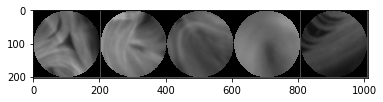

In [39]:
batch_size = 256
testset = defectDataset_df(df = split_and_sample(df_train = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'hard',n_samples = 800), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)

print("testloader ready!")

use_gpu = torch.cuda.is_available()

if use_gpu:
    print("GPU in use")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

classes = ["pos","neg","pos_o","nuc","non"]
num_of_classes = len(classes)

model_ft = torch.load('/home/rliu/defect_classifier/models/python/res34_600epo_uniform_01-07-18.model')
model_ft.eval()
if use_gpu:
#     model_ft = torch.nn.DataParallel(model_ft)
    model_ft.to(device)
    
correct = 0
total = 0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            if len(labels) == batch_size:
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
                correct += c[i].item()
                total += 1
#         print(predicted)
#         print(labels
#         if len(labels) == batch_size:
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#       print('processed: %d' % total)
#       print('correct: %d' % correct)
    print('Accuracy of the network on the test images: %.5f %%' % (100 * correct / total))
    for i in range(5):
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
    print(class_total)
    print(class_correct)
    print(total)
    print(correct)
batch_size = 5
testset = defectDataset_df(df = split_and_sample(df_train = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'hard',n_samples = 500), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
outputs = model_ft(images)
# print(outputs)
confidences = F.softmax(outputs, dim=1)
# print(confidences)
confidence = confidences[:,0] # confidence score with softmax
_, predicted = torch.max(outputs, 1)
# print(confidence)
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

### 

testloader ready!
GPU in use
Accuracy of the network on the test images: 84.08854 %
Accuracy of   pos : 86 %
Accuracy of   neg : 92 %
Accuracy of pos_o : 75 %
Accuracy of   nuc : 75 %
Accuracy of   non : 89 %
GroundTruth:    nuc   nuc pos_o pos_o   pos
Predicted:      nuc   nuc pos_o pos_o   pos


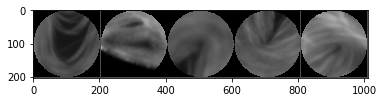

In [6]:
batch_size = 256
testset = defectDataset_df(df = split_and_sample(df_labels = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'yolo',n_samples = 800), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)

print("testloader ready!")

use_gpu = torch.cuda.is_available()

if use_gpu:
    print("GPU in use")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

classes = ["pos","neg","pos_o","nuc","non"]
num_of_classes = len(classes)

model_ft = torch.load('/home/rliu/defect_classifier/models/python/res34_600epo_uniform_01-07-18.model')
model_ft.eval()
if use_gpu:
#     model_ft = torch.nn.DataParallel(model_ft)
    model_ft.to(device)
    
correct = 0
total = 0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            if len(labels) == batch_size:
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
#         print(predicted)
#         print(labels)
        if len(labels) == batch_size:
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
#       print('processed: %d' % total)
#       print('correct: %d' % correct)
    print('Accuracy of the network on the test images: %.5f %%' % (100 * correct / total))
    for i in range(5):
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

batch_size = 5
testset = defectDataset_df(df = split_and_sample(df_labels = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'yolo',n_samples = 500), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
outputs = model_ft(images)
# print(outputs)
confidences = F.softmax(outputs, dim=1)
# print(confidences)
confidence = confidences[:,0] # confidence score with softmax
_, predicted = torch.max(outputs, 1)
# print(confidence)
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

testloader ready!
GPU in use
Accuracy of the network on the test images: 81.87500 %
Accuracy of   pos : 88 %
Accuracy of   neg : 90 %
Accuracy of pos_o : 66 %
Accuracy of   nuc : 72 %
Accuracy of   non : 91 %
GroundTruth:    pos   pos   pos   non pos_o
Predicted:    pos_o   pos   pos   non   non


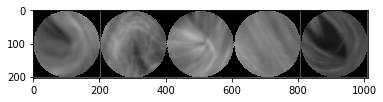

In [7]:
batch_size = 256
testset = defectDataset_df(df = split_and_sample(df_labels = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'yolo', non_inner_circle = 0.02, non_outer_circle = 0.07 ,n_samples = 800), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)

print("testloader ready!")

use_gpu = torch.cuda.is_available()

if use_gpu:
    print("GPU in use")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

classes = ["pos","neg","pos_o","nuc","non"]
num_of_classes = len(classes)

model_ft = torch.load('/home/rliu/defect_classifier/models/python/res34_600epo_hard_01-07-18.model')
model_ft.eval()
if use_gpu:
#     model_ft = torch.nn.DataParallel(model_ft)
    model_ft.to(device)
    
correct = 0
total = 0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            if len(labels) == batch_size:
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
#         print(predicted)
#         print(labels)
        if len(labels) == batch_size:
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
#       print('processed: %d' % total)
#       print('correct: %d' % correct)
    print('Accuracy of the network on the test images: %.5f %%' % (100 * correct / total))
    for i in range(5):
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
        
batch_size = 5
testset = defectDataset_df(df = split_and_sample(df_labels = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'yolo',non_inner_circle = 0.02, non_outer_circle = 0.07, n_samples = 500), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
outputs = model_ft(images)
# print(outputs)
confidences = F.softmax(outputs, dim=1)
# print(confidences)
confidence = confidences[:,0] # confidence score with softmax
_, predicted = torch.max(outputs, 1)
# print(confidence)
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

testloader ready!
GPU in use
Accuracy of the network on the test images: 82.55208 %
Accuracy of   pos : 87 %
Accuracy of   neg : 89 %
Accuracy of pos_o : 68 %
Accuracy of   nuc : 72 %
Accuracy of   non : 95 %
GroundTruth:    neg   nuc   nuc pos_o pos_o
Predicted:      neg   nuc   neg pos_o pos_o


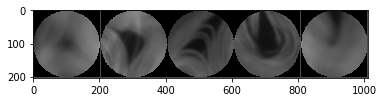

In [35]:
batch_size = 256
testset = defectDataset_df(df = split_and_sample(df_train = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'uniform',n_samples = 800), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)

print("testloader ready!")

use_gpu = torch.cuda.is_available()

if use_gpu:
    print("GPU in use")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

classes = ["pos","neg","pos_o","nuc","non"]
num_of_classes = len(classes)

model_ft = torch.load('/home/rliu/defect_classifier/models/python/res34_600epo_hard_01-07-18.model')
model_ft.eval()
if use_gpu:
#     model_ft = torch.nn.DataParallel(model_ft)
    model_ft.to(device)
    
correct = 0
total = 0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            if len(labels) == batch_size:
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
#         print(predicted)
#         print(labels)
        if len(labels) == batch_size:
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
#       print('processed: %d' % total)
#       print('correct: %d' % correct)
    print('Accuracy of the network on the test images: %.5f %%' % (100 * correct / total))
    for i in range(5):
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
        
batch_size = 5
testset = defectDataset_df(df = split_and_sample(df_train = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'uniform',n_samples = 500), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
outputs = model_ft(images)
# print(outputs)
confidences = F.softmax(outputs, dim=1)
# print(confidences)
confidence = confidences[:,0] # confidence score with softmax
_, predicted = torch.max(outputs, 1)
# print(confidence)
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

In [36]:
batch_size = 256
testset = defectDataset_df(df = split_and_sample(df_train = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'uniform',n_samples = 800), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)

print("testloader ready!")

use_gpu = torch.cuda.is_available()

if use_gpu:
    print("GPU in use")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

classes = ["pos","neg","pos_o","nuc","non"]
num_of_classes = len(classes)

model_ft = torch.load('/home/rliu/defect_classifier/models/matlab/resnet1_withnon.model')
model_ft.eval()
if use_gpu:
#     model_ft = torch.nn.DataParallel(model_ft)
    model_ft.to(device)
    
correct = 0
total = 0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            if len(labels) == batch_size:
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
#         print(predicted)
#         print(labels)
        if len(labels) == batch_size:
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
#       print('processed: %d' % total)
#       print('correct: %d' % correct)
    print('Accuracy of the network on the test images: %.5f %%' % (100 * correct / total))
    for i in range(5):
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
        
batch_size = 5
testset = defectDataset_df(df = split_and_sample(df_train = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" "),
                                                      method = 'uniform',n_samples = 500), window_size = window_size, transforms=data_transform)
testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
outputs = model_ft(images)
# print(outputs)
confidences = F.softmax(outputs, dim=1)
# print(confidences)
confidence = confidences[:,0] # confidence score with softmax
_, predicted = torch.max(outputs, 1)
# print(confidence)
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

testloader ready!
GPU in use


/home/rliu/.local/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.parallel.data_parallel.DataParallel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/rliu/.local/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/rliu/.local/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the

RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[128, 1, 200, 200] to have 3 channels, but got 1 channels instead